**Shubham Gopal Raul**  
*CB.EN.P2AEL23023*<br>

## <center>CAR PRICE PREDICTION</center>

In [2]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from mlxtend.plotting import plot_learning_curves
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('..\Data\car data.csv')
data.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [4]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
data.describe()

Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

### Car Data Visualization
<br></br>

Text(0.5, 1.0, 'Correlation Matrix')

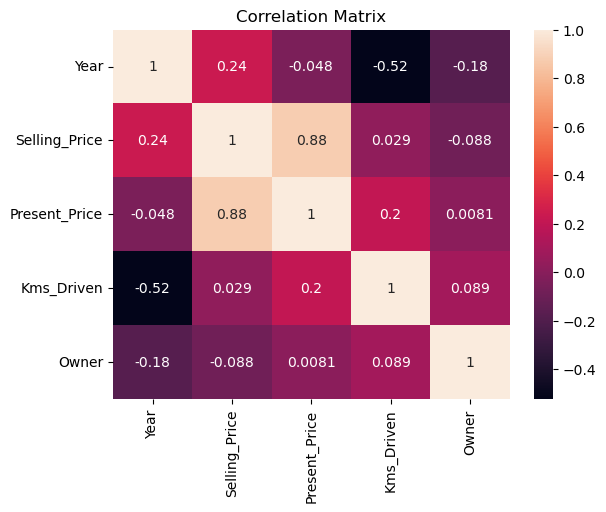

In [6]:
sns.heatmap(data.corr(),annot=True).set_title('Correlation Matrix')

Text(0.5, 0, 'Selling_Price Correlation')

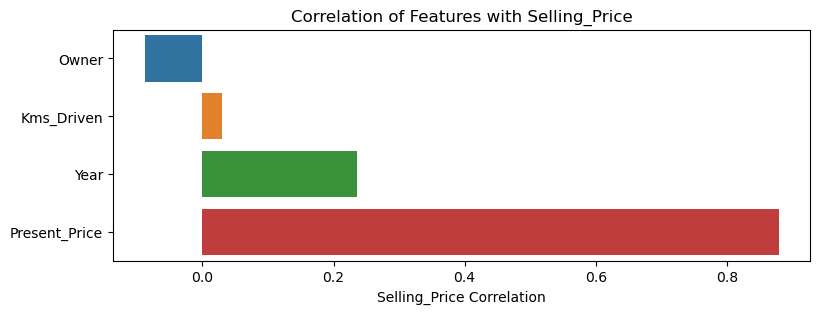

In [7]:
fig = plt.figure(figsize=(9,3))
df_corr = pd.DataFrame(data.corr())['Selling_Price'].drop('Selling_Price').sort_values()
sns.barplot(x=df_corr.values,y=df_corr.index,orient='h').set_title('Correlation of Features with Selling_Price')
plt.xlabel('Selling_Price Correlation')

Text(0.5, 1.0, 'Selling_Price VS Year')

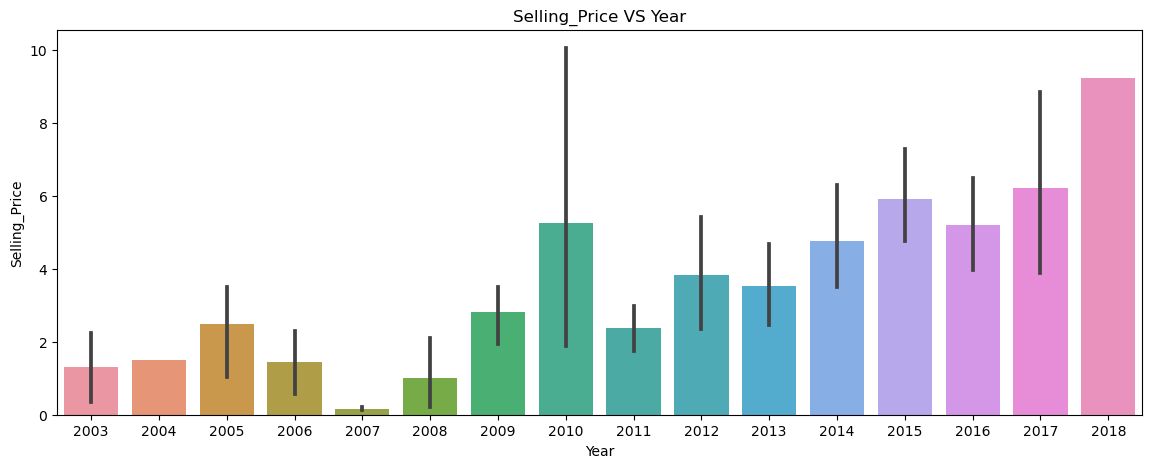

In [8]:
fig1 = plt.figure(figsize=(14,5))
sns.barplot(data,x='Year',y='Selling_Price').set_title('Selling_Price VS Year')

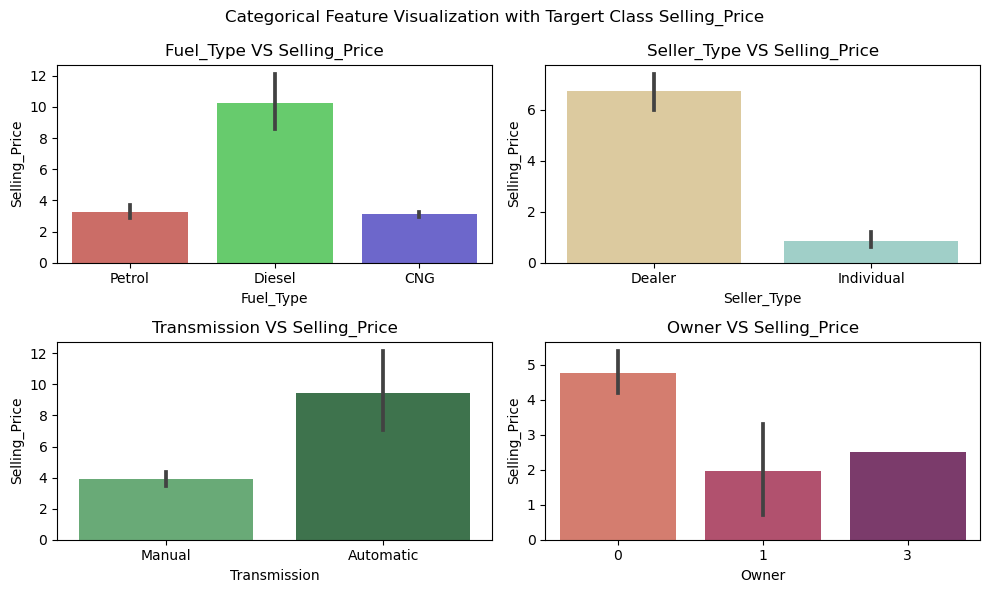

In [9]:
fig2 = plt.figure(figsize=(10,6))
fig2.suptitle('Categorical Feature Visualization with Targert Class Selling_Price')
Pal = [None,'hls','BrBG','Greens_d','flare']
for i in range(1,5):
    ax2 = fig2.add_subplot(2,2,i)
    sns.barplot(data,x=data.columns[4+i],y='Selling_Price',palette=Pal[i]).set_title(data.columns[4+i]+' VS Selling_Price')
    plt.tight_layout()

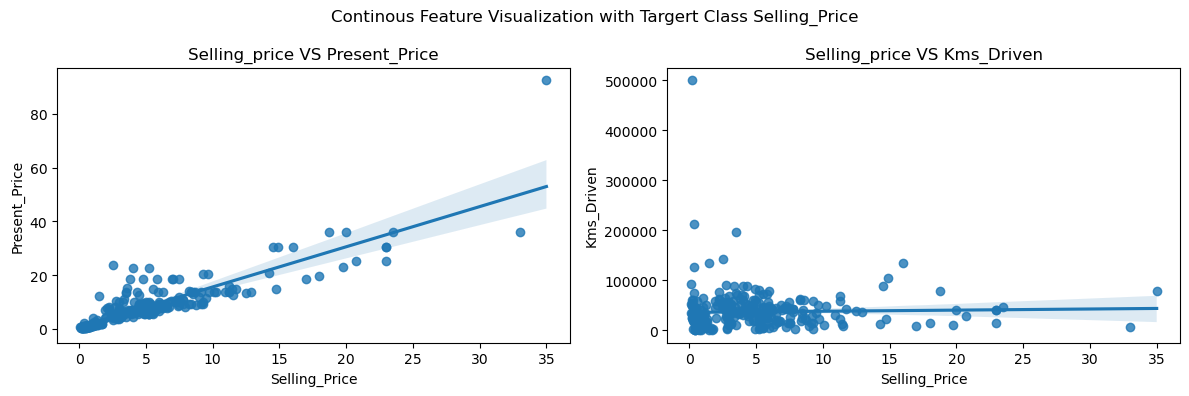

In [10]:
fig3 = plt.figure(figsize=(12,4))
fig3.suptitle('Continous Feature Visualization with Targert Class Selling_Price')
for i in range(1,3):
    ax3 = fig3.add_subplot(1,2,i)
    sns.regplot(data,x='Selling_Price',y=data.columns[2+i]).set_title('Selling_price VS '+data.columns[2+i])
    plt.tight_layout()

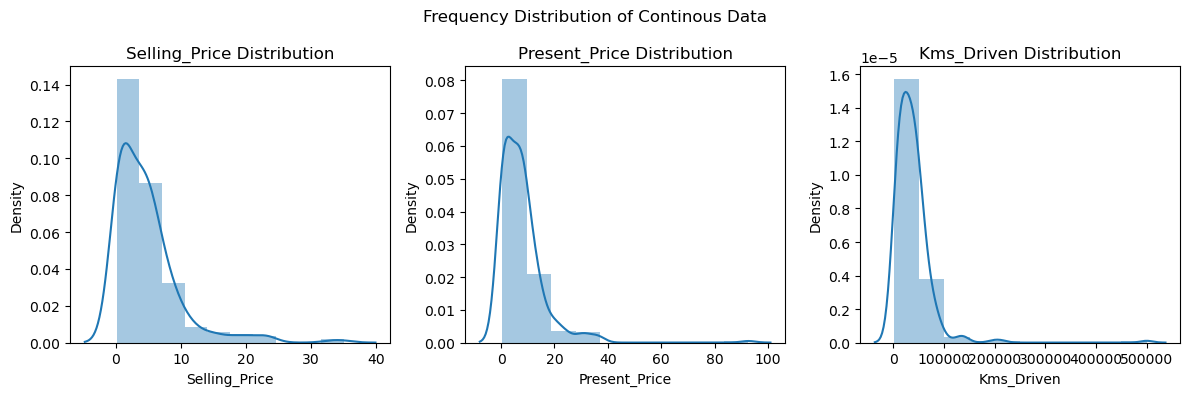

In [11]:
fig4 = plt.figure(figsize=(12,4))
fig4.suptitle('Frequency Distribution of Continous Data')
for i in range(1,4):
    ax4 = fig4.add_subplot(1,3,i)
    sns.distplot(data.iloc[:,1+i],bins=10).set_title(data.columns[1+i]+' Distribution')
    plt.tight_layout()

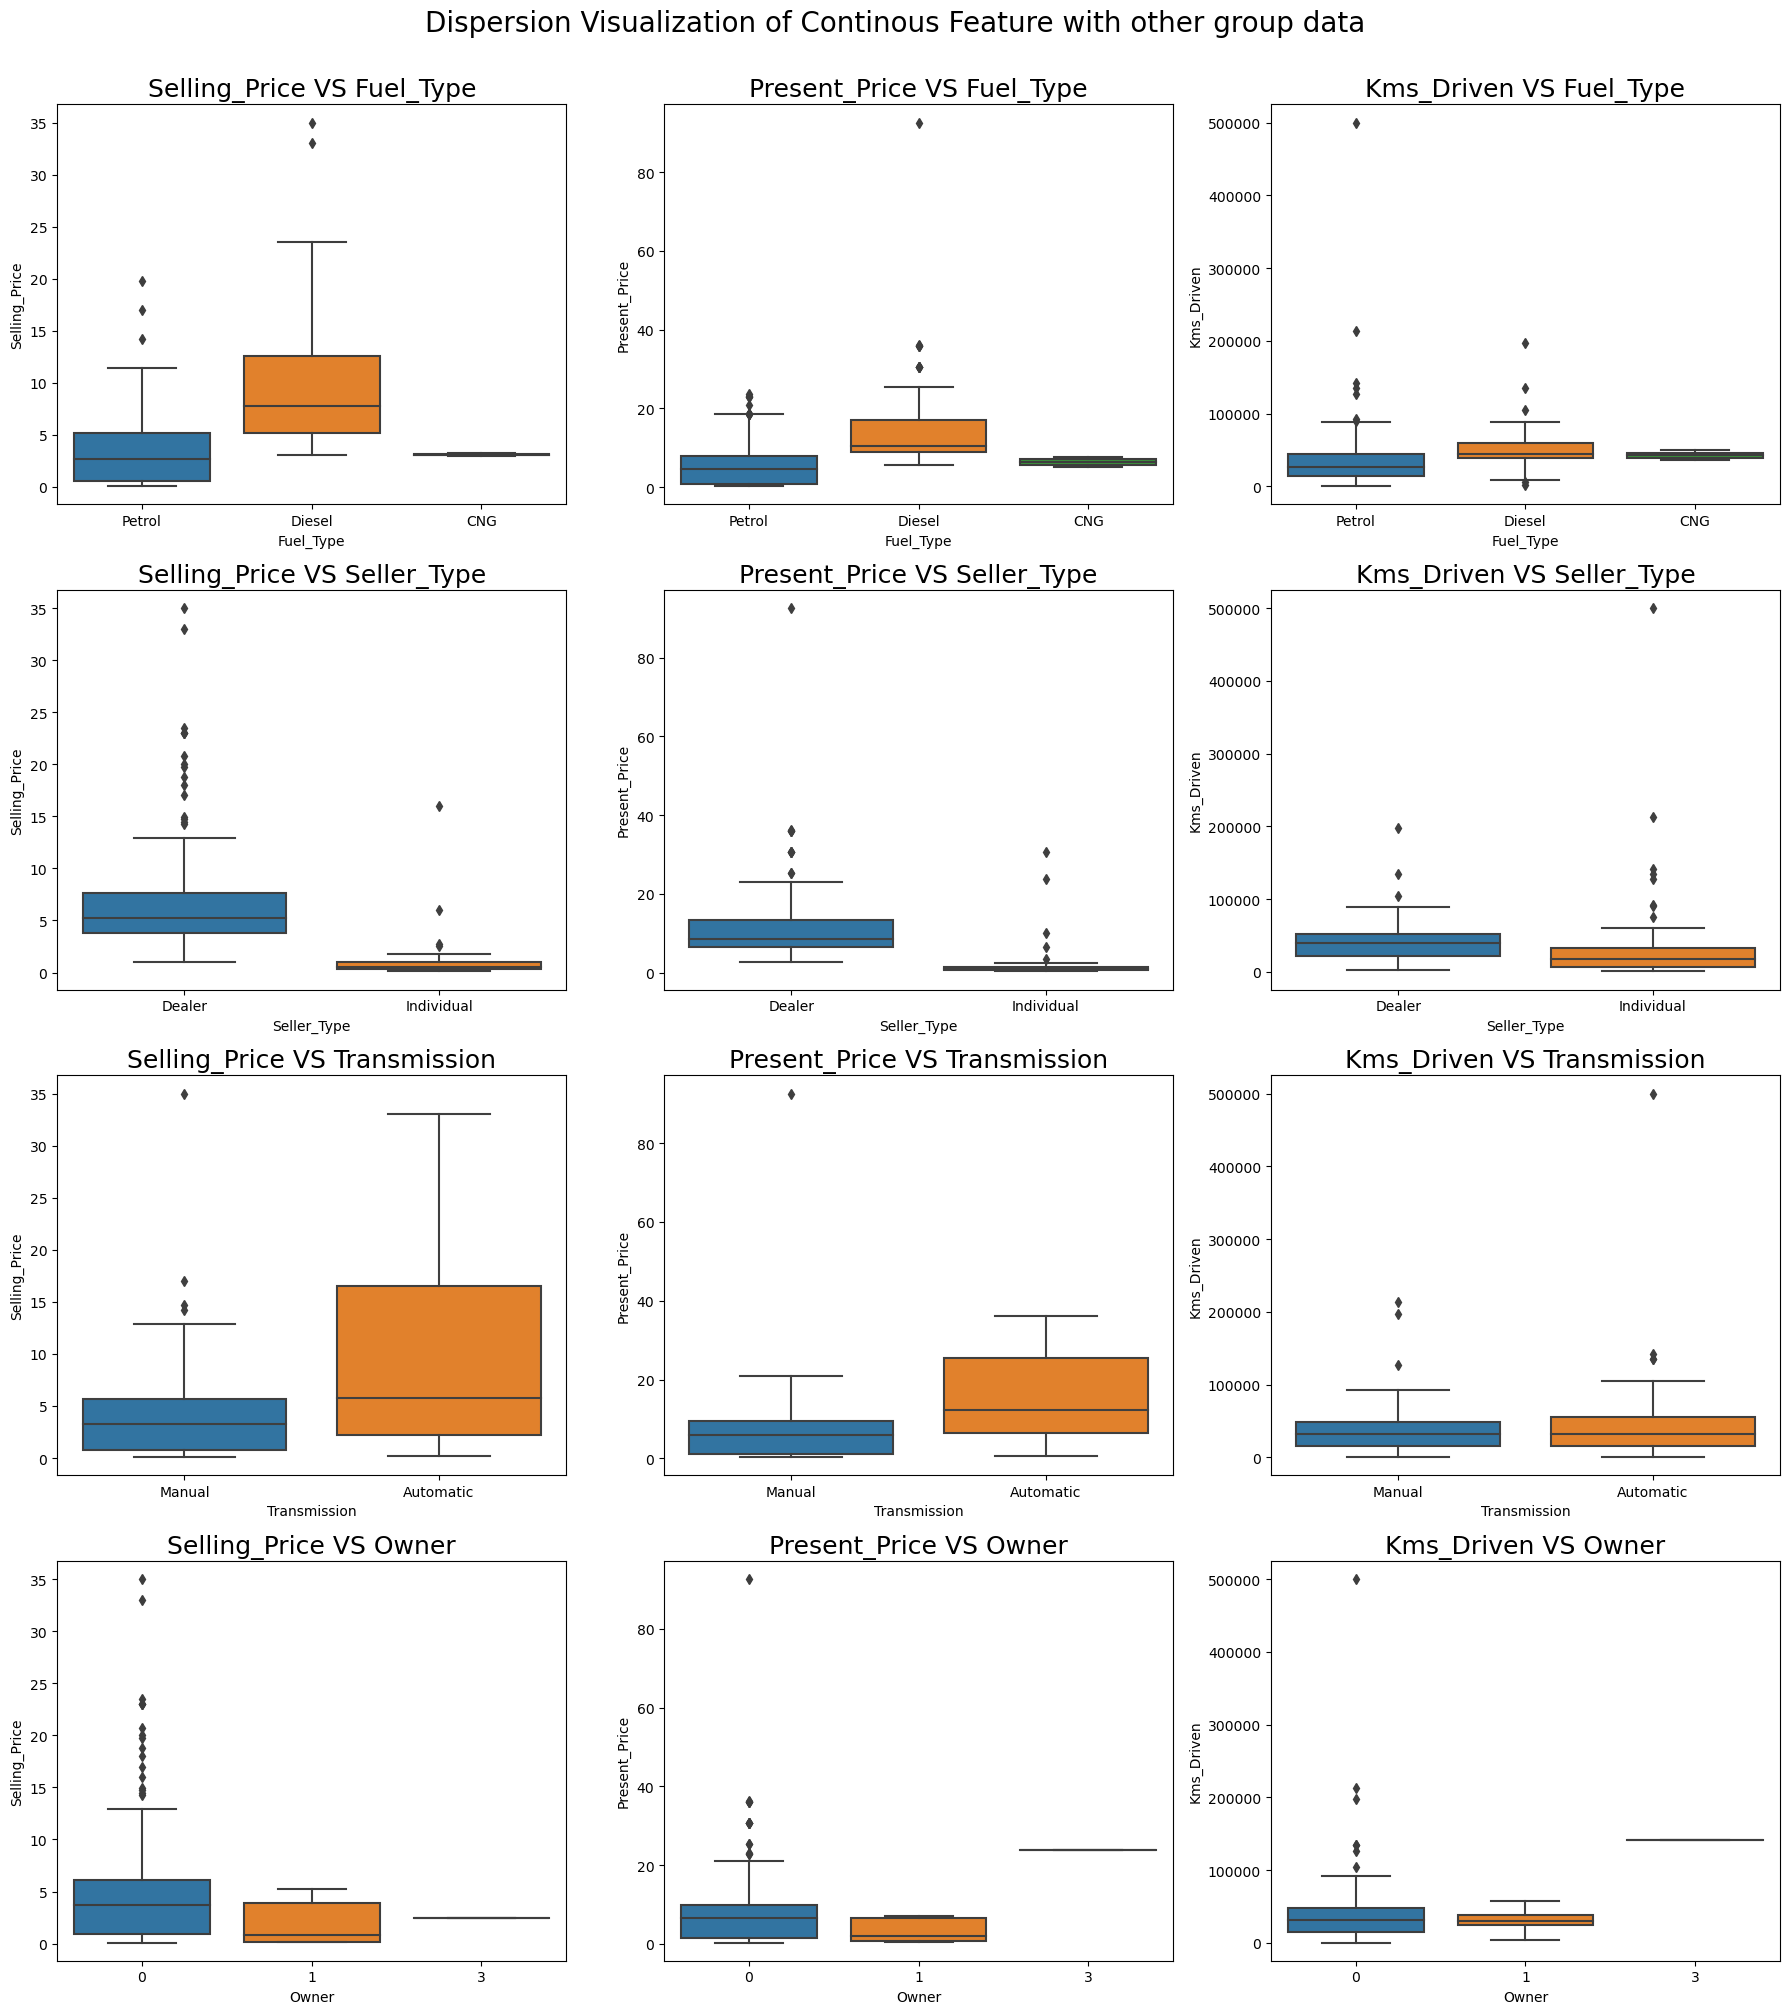

In [12]:
fig5 ,k = plt.figure(figsize=(18,20)),0
fig5.suptitle('Dispersion Visualization of Continous Feature with other group data',fontsize=20,y=1.005)
for i in range(4):
    for j in range(3):
        k+=1
        ax5 = fig5.add_subplot(4,3,k)
        sns.boxplot(data,y=data.columns[2+j],x=data.columns[5+i]).set_title(data.columns[2+j]+' VS '+data.columns[5+i],fontsize=18)
        plt.tight_layout()

### Encoding

In [13]:
def Car_data_encode(df):
    Encoded_data = pd.DataFrame(data.loc[:,'Present_Price'])
    # Ordinal Encoding on Year
    Ordinal_Encoder = preprocessing.OrdinalEncoder(categories=[list(sorted(data['Year'].unique()))])
    Encoded_data['Year'] = Ordinal_Encoder.fit_transform(data[['Year']])
    #Scaling the Kms Countinous feature
    Scaler = preprocessing.Normalizer(norm='l2')
    Encoded_data['Kms_Driven'] = Scaler.fit_transform([data['Kms_Driven']])[0]
    # One Hot Encoding on Categorical Data
    OneHot_Encoder = preprocessing.OneHotEncoder()
    Encoded_data[OneHot_Encoder.get_feature_names_out()] = pd.DataFrame(OneHot_Encoder.fit_transform(data[['Fuel_Type','Seller_Type','Transmission','Owner']]).toarray())
    return Encoded_data

In [14]:
Car_Feature = Car_data_encode(data)
Car_Target = data[['Selling_Price']]
Car_Feature

Present_Price  Year  Kms_Driven  Fuel_Type_CNG  Fuel_Type_Diesel  \
0             5.59  11.0    0.029038            0.0               0.0   
1             9.54  10.0    0.046246            0.0               1.0   
2             9.85  14.0    0.007421            0.0               0.0   
3             4.15   8.0    0.005593            0.0               0.0   
4             6.87  11.0    0.045654            0.0               1.0   
..             ...   ...         ...            ...               ...   
296          11.60  13.0    0.036554            0.0               1.0   
297           5.90  12.0    0.064529            0.0               0.0   
298          11.00   6.0    0.094572            0.0               0.0   
299          12.50  14.0    0.009679            0.0               1.0   
300           5.90  13.0    0.005876            0.0               0.0   

     Fuel_Type_Petrol  Seller_Type_Dealer  Seller_Type_Individual  \
0                 1.0                 1.0                     0.0   
1                 0.0                 1.0                     0.0   
2                 1.0                 1.0                     0.0   
3                 1.0                 1.0                     0.0   
4                 0.0                 1.0                     0.0   
..                ...                 ...                     ...   
296               0.0                 1.0                     0.0   
297               1.0                 1.0                     0.0   
298               1.0                 1.0                     0.0   
299               0.0                 1.0                     0.0   
300               1.0                 1.0                     0.0   

     Transmission_Automatic  Transmission_Manual  Owner_0  Owner_1  Owner_3  
0                       0.0                  1.0      1.0      0.0      0.0  
1                       0.0                  1.0      1.0      0.0      0.0  
2                       0.0                  1.0      1.0      0.0      0.0  
3                       0.0                  1.0      1.0      0.0      0.0  
4                       0.0                  1.0      1.0      0.0      0.0  
..                      ...                  ...      ...      ...      ...  
296                     0.0                  1.0      1.0      0.0      0.0  
297                     0.0                  1.0      1.0      0.0      0.0  
298                     0.0                  1.0      1.0      0.0      0.0  
299                     0.0                  1.0      1.0      0.0      0.0  
300                     0.0                  1.0      1.0      0.0      0.0  

[301 rows x 13 columns]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(Car_Feature,Car_Target,test_size=0.2,random_state=100)

In [15]:
def performance_report(y_true,y_pred,model):
    report = {
        'Model' : model,
        'R2 Score' : round(r2_score(y_true,y_pred),2),
        'Root Mean Square Error' : round(math.sqrt(mean_squared_error(y_true,y_pred)),2),
        'Mean Absolute Error' : round(mean_absolute_error(y_true,y_pred),2),
        'Mean Absolute Percentage Error' : round(mean_absolute_percentage_error(y_true,y_pred),2)
    }
    return report
    
def accuracy_plot(y_true,y_pred,model):
    Model_Score = pd.DataFrame(y_pred,columns=['Predicted Value'])
    Model_Score['Actual Value'] = list(y_true['Selling_Price'])
    ax1 = px.line(Model_Score,title=model+' Model Accuracy')
    return ax1

def print_perf(df):
    for i in df.columns[1:]:
        print(i+', for {} Model is : {}'.format(df['Model'][0],df[i][0]),end='\n\n')
    return

In [16]:
Performance_Report = pd.DataFrame()
MODEL = []

### Linear Regression Model

In [17]:
Linear_Model = LinearRegression()
Linear_Model.fit(X_train,Y_train)
Y_pred = Linear_Model.predict(X_test)
df = pd.DataFrame([performance_report(Y_test,Y_pred,'Linear Regression')])
print_perf(df)
Performance_Report = pd.concat([Performance_Report,df])
MODEL.append(Linear_Model)
accuracy_plot(Y_test,Y_pred,'Linear Regression')

R2 Score, for Linear Regression Model is : 0.8

Root Mean Square Error, for Linear Regression Model is : 2.27

Mean Absolute Error, for Linear Regression Model is : 1.36

Mean Absolute Percentage Error, for Linear Regression Model is : 1.38



### Ridge Model

In [18]:
Ridge_Model = Ridge()
Ridge_Model.fit(X_train,Y_train)
Y_pred = Ridge_Model.predict(X_test)
df = pd.DataFrame([performance_report(Y_test,Y_pred,'Ridge Regression')])
print_perf(df)
Performance_Report = pd.concat([Performance_Report,df])
MODEL.append(Ridge_Model)
accuracy_plot(Y_test,Y_pred,'Ridge Regression')

R2 Score, for Ridge Regression Model is : 0.8

Root Mean Square Error, for Ridge Regression Model is : 2.28

Mean Absolute Error, for Ridge Regression Model is : 1.37

Mean Absolute Percentage Error, for Ridge Regression Model is : 1.39



### Lasso Model

In [19]:
Lasso_Model = Lasso()
Lasso_Model.fit(X_train,Y_train)
Y_pred = Lasso_Model.predict(X_test)
df = pd.DataFrame([performance_report(Y_test,Y_pred,'Lasso Regression')])
print_perf(df)
Performance_Report = pd.concat([Performance_Report,df])
MODEL.append(Lasso_Model)
accuracy_plot(Y_test,Y_pred,'Lasso Regression')

R2 Score, for Lasso Regression Model is : 0.77

Root Mean Square Error, for Lasso Regression Model is : 2.42

Mean Absolute Error, for Lasso Regression Model is : 1.46

Mean Absolute Percentage Error, for Lasso Regression Model is : 1.16



### SVM Model

In [20]:
SVM_Model = SVR()
SVM_Model.fit(X_train,Y_train)
Y_pred = SVM_Model.predict(X_test)
df = pd.DataFrame([performance_report(Y_test,Y_pred,'Support Vector Regression')])
print_perf(df)
Performance_Report = pd.concat([Performance_Report,df])
MODEL.append(SVM_Model)
accuracy_plot(Y_test,Y_pred,'Support Vector Regression')

R2 Score, for Support Vector Regression Model is : 0.72

Root Mean Square Error, for Support Vector Regression Model is : 2.66

Mean Absolute Error, for Support Vector Regression Model is : 1.02

Mean Absolute Percentage Error, for Support Vector Regression Model is : 0.36



### KNN Regressor

In [21]:
KNN_Model = KNeighborsRegressor(n_neighbors=4)
KNN_Model.fit(X_train,Y_train)
Y_pred = KNN_Model.predict(X_test)
df = pd.DataFrame([performance_report(Y_test,Y_pred,'KNN Regression')])
print_perf(df)
Performance_Report = pd.concat([Performance_Report,df])
MODEL.append(KNN_Model)
accuracy_plot(Y_test,Y_pred,'KNN Regression')

R2 Score, for KNN Regression Model is : 0.86

Root Mean Square Error, for KNN Regression Model is : 1.91

Mean Absolute Error, for KNN Regression Model is : 0.89

Mean Absolute Percentage Error, for KNN Regression Model is : 0.25



### Decision Tree Regressor

In [22]:
DecisionTree_Model = DecisionTreeRegressor()
DecisionTree_Model.fit(X_train,Y_train)
Y_pred = DecisionTree_Model.predict(X_test)
df = pd.DataFrame([performance_report(Y_test,Y_pred,'Dicison Tree Regression')])
print_perf(df)
Performance_Report = pd.concat([Performance_Report,df])
MODEL.append(DecisionTree_Model)
accuracy_plot(Y_test,Y_pred,'Dicison Tree Regression')

R2 Score, for Dicison Tree Regression Model is : 0.77

Root Mean Square Error, for Dicison Tree Regression Model is : 2.43

Mean Absolute Error, for Dicison Tree Regression Model is : 1.08

Mean Absolute Percentage Error, for Dicison Tree Regression Model is : 0.28



### Random Forest Regressor

In [23]:
RandomForest_Model = RandomForestRegressor()
RandomForest_Model.fit(X_train,Y_train)
Y_pred = RandomForest_Model.predict(X_test)
df = pd.DataFrame([performance_report(Y_test,Y_pred,'Random Forest Regression')])
print_perf(df)
Performance_Report = pd.concat([Performance_Report,df])
MODEL.append(RandomForest_Model)
accuracy_plot(Y_test,Y_pred,'Random Forest Regression')

R2 Score, for Random Forest Regression Model is : 0.85

Root Mean Square Error, for Random Forest Regression Model is : 1.99

Mean Absolute Error, for Random Forest Regression Model is : 0.86

Mean Absolute Percentage Error, for Random Forest Regression Model is : 0.22



### Gradient Boosting

In [24]:
GradienBoost_Model = GradientBoostingRegressor()
GradienBoost_Model.fit(X_train,Y_train)
Y_pred = GradienBoost_Model.predict(X_test)
df = pd.DataFrame([performance_report(Y_test,Y_pred,'Gradien Boosting Regression')])
print_perf(df)
Performance_Report = pd.concat([Performance_Report,df])
MODEL.append(GradienBoost_Model)
accuracy_plot(Y_test,Y_pred,'Gradien Boosting Regression')

R2 Score, for Gradien Boosting Regression Model is : 0.83

Root Mean Square Error, for Gradien Boosting Regression Model is : 2.06

Mean Absolute Error, for Gradien Boosting Regression Model is : 0.93

Mean Absolute Percentage Error, for Gradien Boosting Regression Model is : 0.27



### Model Performance Comparison

<br></br>

In [25]:
Performance_Report.index = [i for i in range(len(Performance_Report))]
Performance_Report

Model  R2 Score  Root Mean Square Error  \
0            Linear Regression      0.80                    2.27   
1             Ridge Regression      0.80                    2.28   
2             Lasso Regression      0.77                    2.42   
3    Support Vector Regression      0.72                    2.66   
4               KNN Regression      0.86                    1.91   
5      Dicison Tree Regression      0.77                    2.43   
6     Random Forest Regression      0.85                    1.99   
7  Gradien Boosting Regression      0.83                    2.06   

   Mean Absolute Error  Mean Absolute Percentage Error  
0                 1.36                            1.38  
1                 1.37                            1.39  
2                 1.46                            1.16  
3                 1.02                            0.36  
4                 0.89                            0.25  
5                 1.08                            0.28  
6                 0.86                            0.22  
7                 0.93                            0.27

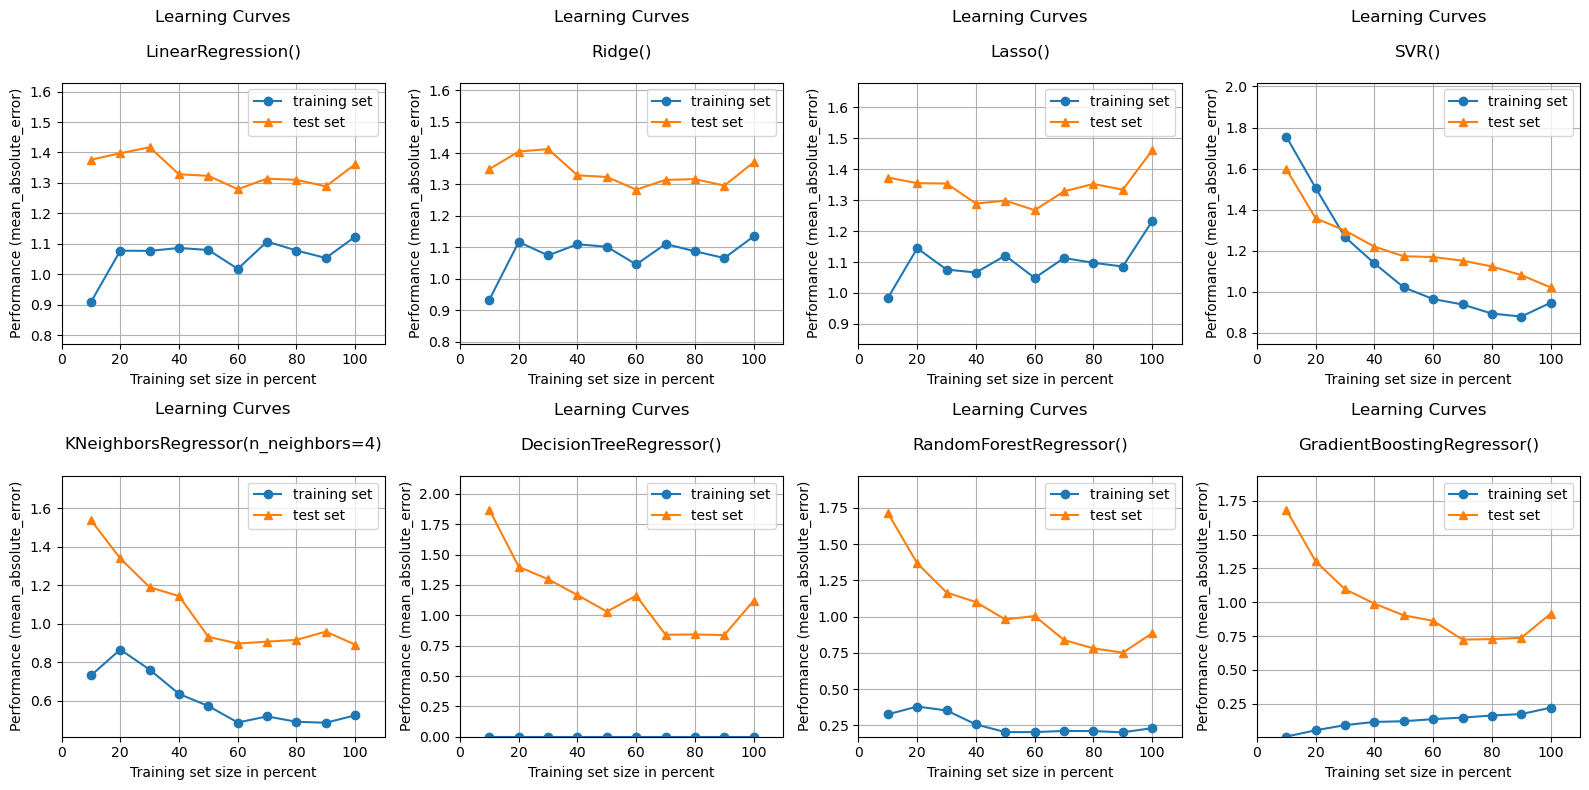

In [26]:
fig = plt.figure(figsize=(16,8))
for i in range(len(MODEL)):
    ax = fig.add_subplot(2,4,i+1)
    plot_learning_curves(X_train,Y_train, X_test, Y_test, MODEL[i], scoring='mean_absolute_error')
    plt.grid()
    plt.tight_layout()
plt.savefig('../Figure/LearningCurve.png')

In [27]:

def annote(ax,h=0):
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2,
                p.get_height()+h,
                f'{p.get_height()}',
                ha='center',
                va='bottom' 
               )
    return None

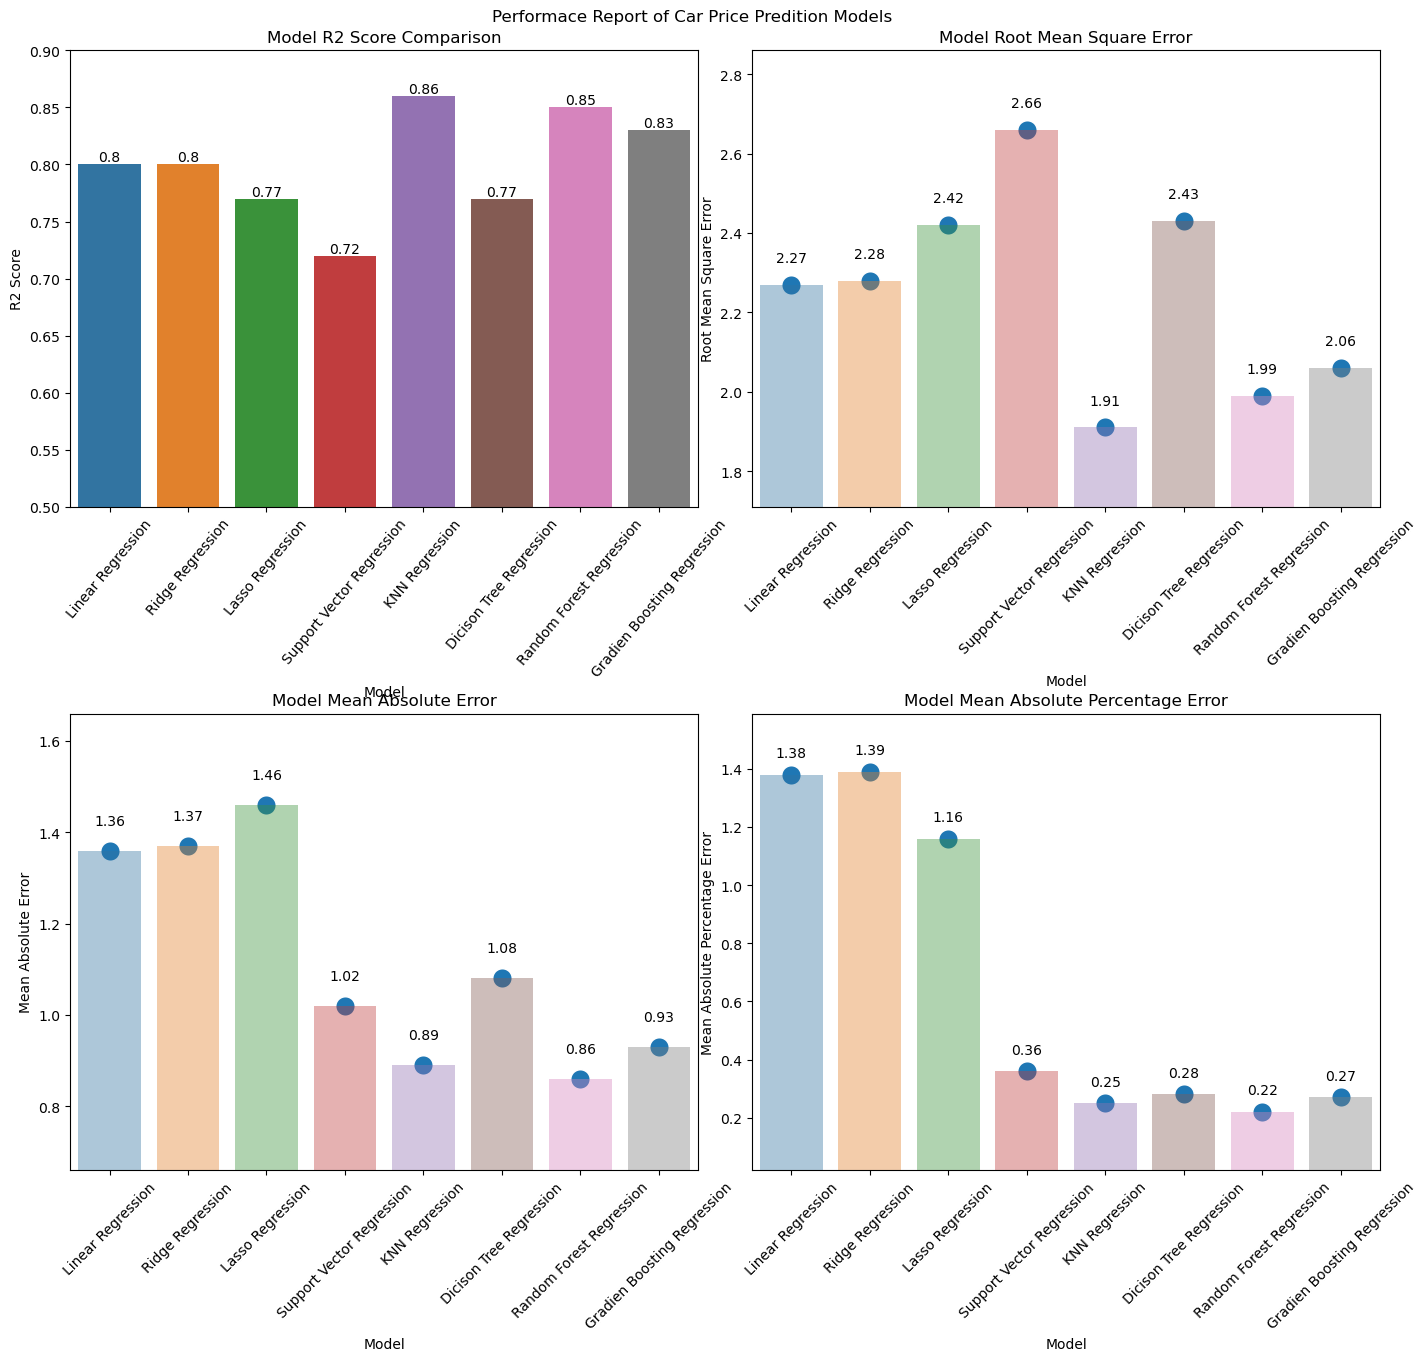

In [28]:
fig6 = plt.figure(figsize=(14,12))
fig6.suptitle('Performace Report of Car Price Predition Models ')
ax = fig6.add_subplot(2,2,1)
sns.barplot(Performance_Report,x='Model',y='R2 Score',label='R2 Score').set_title('Model R2 Score Comparison')
ax = plt.gca()
annote(ax)
plt.xticks(rotation=50)
plt.ylim(0.5,0.9)
plt.tight_layout()
for i in range(2,5):
    ax = fig6.add_subplot(2,2,i)
    column = Performance_Report.columns[i]
    sns.scatterplot(data=Performance_Report,x='Model',y=column,s=200)
    bar = sns.barplot(data=Performance_Report,x='Model',y=column,alpha=0.4,errwidth=0).set_title('Model '+column)
    ax = plt.gca()
    annote(ax,0.05)
    Min = min(Performance_Report[column]) - 0.2
    Max = max(Performance_Report[column]) + 0.2
    plt.ylim(Min,Max)
    plt.xticks(rotation=45)
plt.savefig('../Figure/Performace.png')